In [1]:
cd ../

/Users/gabrielgilling/Documents/GitHub/simulacra-fake-data


In [2]:
import pandas as pd
import numpy as np
from scipy.stats import logistic

# from py_scripts.add_data import *
# from py_scripts.define_data import *
# from py_scripts.generate_data import *
# from py_scripts.generate_dist import *
# from py_scripts.group_data import *
# from py_scripts.utility import *
# from py_scripts.internal_utility import *

from py_scripts.define_data import defData, defCondition
from py_scripts.generate_data import genData
from py_scripts.group_data import addPeriods
from py_scripts.add_data import addColumns, addCondition

In [21]:
# d1 = defData(varname = "atm", formula ="0.05,"*20,
#              variance = ','.join(['atm'+str(i) for i in range(1,21)]), 
#              dist = "categorical")

d1 = pd.DataFrame({'atm':['atm'+str(i) for i in range(1,21)],
                   'district': np.tile(['A','B','C','D'], 5),
                   'atm_init': [int(i) for i in np.random.normal(1000, 200, 20)],
                   'atm_upperbound': [int(i) for i in np.random.normal(1200, 100, 20)],
                   'district_pop':  np.tile(np.random.poisson(25, 4), 5),
                   'avg_district_income': np.tile(np.random.uniform(500, 2000, 4), 5)
})

d1
# dd = genData(1000, d1)
# this should work with ints and not just strings!!

# d1 = defData(d1, varname = "cash", formula = 1000, variance=200**2, dist = "normal")
# d1 = defData(d1, varname = "pop", formula = "20,25", dist = 'uniformInt')
# formula and variance should be passabeable as both strings and ints


,atm,district,atm_init,atm_upperbound,district_pop,avg_district_income
0,atm1,A,927,1098,22,1725.777346
1,atm2,B,923,1182,19,1056.026992
2,atm3,C,802,1317,19,838.944163
3,atm4,D,1251,1039,30,1515.247681
4,atm5,A,703,1203,22,1725.777346
5,atm6,B,649,1119,19,1056.026992
6,atm7,C,970,1197,19,838.944163
7,atm8,D,1070,1198,30,1515.247681
8,atm9,A,617,967,22,1725.777346
9,atm10,B,1088,1162,19,1056.026992


In [22]:
d1['atm_init'] = np.where(d1['atm_init'] >= d1['atm_upperbound'], 
                  d1['atm_upperbound'], d1['atm_init'])

,atm,district,atm_init,atm_upperbound,district_pop,avg_district_income
0,atm1,A,927,1098,22,1725.777346
1,atm2,B,923,1182,19,1056.026992
2,atm3,C,802,1317,19,838.944163
3,atm4,D,1039,1039,30,1515.247681
4,atm5,A,703,1203,22,1725.777346
5,atm6,B,649,1119,19,1056.026992
6,atm7,C,970,1197,19,838.944163
7,atm8,D,1070,1198,30,1515.247681
8,atm9,A,617,967,22,1725.777346
9,atm10,B,1088,1162,19,1056.026992


In [5]:
dp = addPeriods(d1, 200, idvars = 'atm')

In [7]:
dp[dp['atm'] == 'atm1']

,atm,district,cash_init,pop,avg_district_income,timeID,period
0,atm1,A,1343,32,1521.077485,1,1
1,atm1,A,1343,32,1521.077485,2,2
2,atm1,A,1343,32,1521.077485,3,3
3,atm1,A,1343,32,1521.077485,4,4
4,atm1,A,1343,32,1521.077485,5,5
...,...,...,...,...,...,...,...
195,atm1,A,1343,32,1521.077485,196,196
196,atm1,A,1343,32,1521.077485,197,197
197,atm1,A,1343,32,1521.077485,198,198
198,atm1,A,1343,32,1521.077485,199,199


In [8]:
defCashNew = defData(varname = 'cash_withdrawals', formula = 'pop*10',
                     dist = 'noZeroPoisson', idx='atm')
defCashNew = defData(defCashNew, varname = 'cash_deposit', formula = 'pop*11',
                     dist = 'noZeroPoisson', idx='atm')
defCashNew = defData(defCashNew, varname = 'atm_bal', 
                     formula = 'cash_init + (cash_deposit - cash_withdrawals)',
                     dist = 'nonrandom', idx='atm')
defCashNew = defData(defCashNew, varname = 'atm_upperbound', formula = 1000, variance = 
                     dist = 'noZeroPoisson', idx='atm')


In [9]:
dd = addColumns(defCashNew, dp)

In [ ]:
# add a column 'upper bound' for the atm balance / generator limit

# add cash to atm until upper bound reached
# if reached, upper bound = 1, otherwise 0 
# if local atm filled, go to another at random within the district

# potential idea: generate spatial data / spatial correlations

In [10]:
dd

,atm,district,cash_init,pop,avg_district_income,timeID,period,cash_withdrawals,cash_deposit,atm_bal
0,atm1,A,1343,32,1521.077485,1,1,331.0,347.0,1359.0
1,atm1,A,1343,32,1521.077485,2,2,335.0,368.0,1376.0
2,atm1,A,1343,32,1521.077485,3,3,307.0,363.0,1399.0
3,atm1,A,1343,32,1521.077485,4,4,314.0,362.0,1391.0
4,atm1,A,1343,32,1521.077485,5,5,311.0,335.0,1367.0
...,...,...,...,...,...,...,...,...,...,...
3995,atm9,A,995,21,1521.077485,3996,196,225.0,255.0,1025.0
3996,atm9,A,995,21,1521.077485,3997,197,207.0,231.0,1019.0
3997,atm9,A,995,21,1521.077485,3998,198,208.0,203.0,990.0
3998,atm9,A,995,21,1521.077485,3999,199,185.0,226.0,1036.0


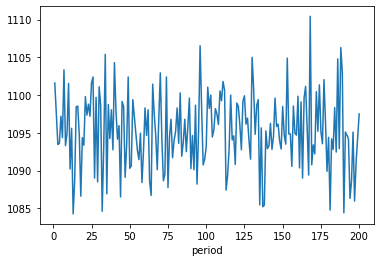

In [11]:
dd.groupby('period')['atm_bal'].mean().plot();

In [12]:
defC = defCondition(condition = "period % 6 == 0", formula = "cash_withdrawals*1.5",
                    dist = "nonrandom")

d = addCondition(defC, dd, newvar="cash_withdrawal_seasonal", keepOld = True)

In [13]:
d

,atm,district,cash_init,pop,avg_district_income,timeID,period,cash_withdrawals,cash_deposit,atm_bal,cash_withdrawal_seasonal
0,atm1,A,1343,32,1521.077485,1,1,331.0,347.0,1359.0,331.0
1,atm1,A,1343,32,1521.077485,2,2,335.0,368.0,1376.0,335.0
2,atm1,A,1343,32,1521.077485,3,3,307.0,363.0,1399.0,307.0
3,atm1,A,1343,32,1521.077485,4,4,314.0,362.0,1391.0,314.0
4,atm1,A,1343,32,1521.077485,5,5,311.0,335.0,1367.0,311.0
...,...,...,...,...,...,...,...,...,...,...,...
3995,atm9,A,995,21,1521.077485,3996,196,225.0,255.0,1025.0,225.0
3996,atm9,A,995,21,1521.077485,3997,197,207.0,231.0,1019.0,207.0
3997,atm9,A,995,21,1521.077485,3998,198,208.0,203.0,990.0,312.0
3998,atm9,A,995,21,1521.077485,3999,199,185.0,226.0,1036.0,185.0


In [14]:
d['bal_seasonal'] = d['cash_init'] + d['cash_deposit']-d['cash_withdrawal_seasonal']

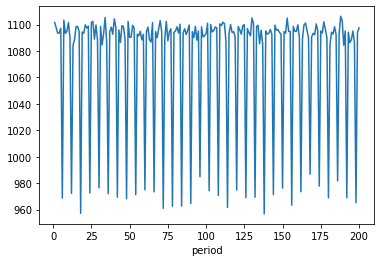

In [17]:
d.groupby('period')['bal_seasonal'].mean().plot();

In [35]:
d.groupby('period')['bal_seasonal'].rolling(10).mean()

period       
1       0           NaN
        2000        NaN
        4000        NaN
        6000        NaN
        8000        NaN
                  ...  
2000    31999    1106.1
        33999    1124.7
        35999    1155.3
        37999    1126.1
        39999    1144.7
Name: bal_seasonal, Length: 40000, dtype: float64